Davies-Bouldin Index: 0.9384521529981805


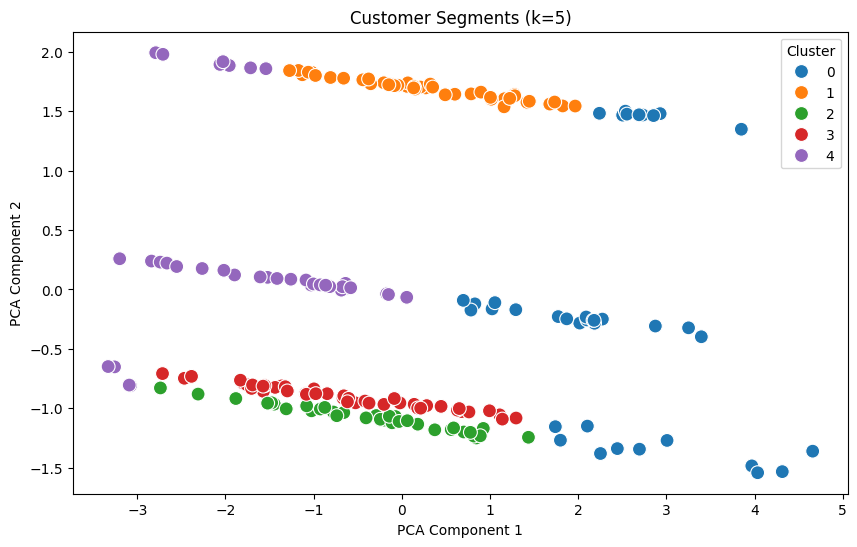


Cluster Characteristics:
         TotalSpending  TotalItems  TransactionCount  Region_Europe  \
Cluster                                                               
0          5935.633421   21.710526          8.026316       0.105263   
1          3702.809048   13.071429          5.142857       0.000000   
2          2920.969730   11.378378          4.783784       0.000000   
3          3146.072045   11.181818          4.500000       1.000000   
4          1642.643684    6.578947          2.736842       0.052632   

         Region_North America  Region_South America  
Cluster                                              
0                    0.184211              0.236842  
1                    0.000000              1.000000  
2                    1.000000              0.000000  
3                    0.000000              0.000000  
4                    0.052632              0.210526  


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load datasets
customers = pd.read_csv("/content/drive/My Drive/Zeotap/Customers.csv")
transactions = pd.read_csv("/content/drive/My Drive/Zeotap/Transactions.csv")

# Convert date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'], format='%d-%m-%Y', errors='coerce')
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], format='%d-%m-%Y %H:%M', errors='coerce')

# Merge datasets
data = transactions.merge(customers, on='CustomerID', how='left')

# Feature engineering: Transaction-level aggregation
agg_data = data.groupby('CustomerID').agg({
    'TotalValue': 'sum',         # Total spending
    'Quantity': 'sum',           # Total items bought
    'TransactionID': 'count',    # Number of transactions
}).rename(columns={
    'TotalValue': 'TotalSpending',
    'Quantity': 'TotalItems',
    'TransactionID': 'TransactionCount'
}).reset_index()

# Add customer profile information
customer_segmentation_data = agg_data.merge(customers[['CustomerID', 'Region']], on='CustomerID', how='left')

# Encode categorical variables (e.g., Region)
customer_segmentation_data = pd.get_dummies(customer_segmentation_data, columns=['Region'], drop_first=True)

# Ensure only numeric columns are used for clustering
numeric_columns = customer_segmentation_data.drop(['CustomerID'], axis=1)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_columns)

# Perform KMeans clustering
k = 5  # Number of clusters (adjust as needed)
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# Assign cluster labels to the original data
customer_segmentation_data['Cluster'] = cluster_labels

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_data, cluster_labels)
print(f"Davies-Bouldin Index: {db_index}")

# Visualize clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = cluster_labels

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', s=100)
plt.title(f'Customer Segments (k={k})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# Analyze cluster characteristics (numeric columns only)
cluster_analysis = customer_segmentation_data.drop('CustomerID', axis=1).groupby('Cluster').mean()
print("\nCluster Characteristics:")
print(cluster_analysis)


In [ ]:
!apt-get install -y texlive-xetex


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0 libkpathsea6
  libpdfbox-java libptexenc1 libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby ruby-net-telnet ruby-rubygems
  ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils teckit tex-common tex-gyre
  texlive-base texlive-binaries texlive-fonts-recommended texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf libavalon-framework-ja

In [ ]:
!jupyter nbconvert "/content/drive/My Drive/Zeotap/S_NITHISHKUMAR_Clustering.ipynb" --to pdf